In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline, FeatureUnion

# Object Oriented Programming in Sklearn

In this extra lesson we will be digging a bit deeper into the `sklearn` library.  Our objective is not so much to learn about `sklearn`, but to explore how a professionally developed, widely used library uses the organizational principles of object oriented programming to provide a good user experience.

The main theme of our explorations will be the power of **Providing a Consistent Interface**.  One of the fundamental commandments of OOP is:

> Program to an interface instead of an implementation.

Sklearn is a stellar example of this important programming philosophy.

## Regressors and Classifiers

The first interface we will explore is the **Regression/Classification Interface**.

**Regression** and **Classification** are two sides of the same coin.  The goal of both is **Predictive Modeling** (also called Supervised Learning, a less self explanatory term).

In a predictive modeling problem we have some data $X$ (often called the **predictors**) which we want to use to make a prediction of another measurement $y$ (often called the **response**).  For example:

  - Use the history of all board game ratings on [Board Game Geek]() ($X$) to predict the rating a user will give a new game ($y$).
  - Use the history of all customers of a car insurance company ($X$) to predict the likelihood of a new customer being involved in a car accident ($y$).
  - Predict which type of animal ($y$) appears in a black and white photo taken by a wildlife camera ($X$).
  - Predict whether a flight will be delayed and, if so, how delayed it will be.
  
The general theme is that:

> We **fit** a model to some data ($X, y$), and then use the model to **predict** given some new data.

Let's look at two examples.

### Regression: Linear Regression

Our first example is **linear regression**.  In linear regression we have data $X$, and our response is a **continuous** measurement.

The data set we will use to demonstrate linear regression contains measurements on a single species of insect captured on two continents.

In [2]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


Suppose we want to predict an insects wing size given the other measurements we have.  Since wing size is a continuous measurement, linear regression is an appropriate way to approach this problem.

All **regression objects** are used in the same way in sklearn.

1\. Create a regression object of the appropriate type.

In [3]:
insects_regression = LinearRegression()

To unwind this a bit, `LinearRegression` is a **class**, and calling the calls with the notation `LinearRegression()` creates an **object** which is an **instance of the LinearRegression class**.

2\. Use the `fit` method on the regression object to train the model using your data.

In [4]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']
insects_regression.fit(X_insects, y_insects)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Above we trained a linear model to create an equation of the form:

$$ \text{WingSize} \approx a + b \times \text{Continent} + c \times \text{Latitude} + d \times \text{Sex} $$

When we used `fit`, the model used the data we supplied to compute the correct values of the numbers $a, b, c, d$.  We can now pull these numbers out of the model object.

In [5]:
print("a = {:2.2f}".format(insects_regression.intercept_))

a = 836.16


In [6]:
print("b, c, d = {}".format(insects_regression.coef_))

b, c, d = [ -4.12890383   1.79260932 -98.85714286]


3\. Use the `predict` method to compute predicted values your data (could be the data you used to train the model, or another dataset entirely.

In [7]:
wing_size_predictions = insects_regression.predict(X_insects)

In [8]:
print(wing_size_predictions[:10])

[895.67349147 898.36240545 901.23058036 904.99505993 905.35358179
 908.04249577 912.70328    915.92997677 919.51519541 921.30780472]


Calling the `predict` method uses the equation to make predictions about wing size.  This is very useful if we had data on insects that we **didn't** know the wingsize of. 

For fun, let's plot the true data and the predicted data in two scatterplots.

Text(0, 0.5, 'Predicted Wing Span')

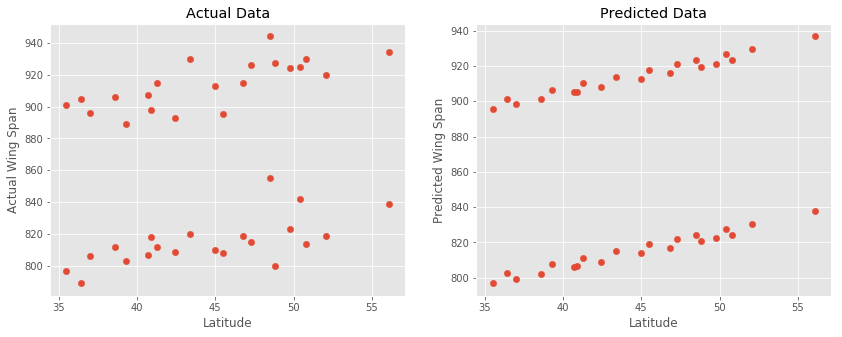

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

**Summary:** A `LinearRegression` uses the methods `fit` and `predict` to adapt itself to data, and to then make predictions.

### Classification: Logistic Regression

Our second example is **logistic regression**.  In logistic regression we have data $X$, and our response 
$y$ is a **binary** measurement.

A **binary** measurement can only take two values, which are traditionally labeled as $0$ and $1$.

Our example will use a dataset of wells in Bangladesh.  Many family wells are contaminated with arsenic; a team of scientists visited and measured:

  - The arsenic levels in each family's well.
  - The distance to the nearest safe well.
  - The level of education of the household.
  - The household's involvement in the community.
  
After discussing the level of arsenic with each family, the families with unsafe levels of arsenic were advised to switch to a nearby safe well.  Years later, the team followed up, and measured which families switched wells.

In [10]:
wells = pd.read_csv('./data/wells.dat', sep=' ')

In [11]:
wells.head()

,id,switch,arsenic,dist,assoc,educ
0,1,1,2.36,16.826000,0,0
1,2,1,0.71,47.321999,0,0
2,3,0,2.07,20.966999,0,10
3,4,1,1.15,21.486000,0,12
4,5,1,1.10,40.874001,1,14


We can use a logistic regression to predict whether a family will switch based on the other data the team measured.

The first step is to create a `LogisticRegression` object.

In [12]:
wells_regression = LogisticRegression()

We can use the `fit` method of the `LogisticRegression` object to train the model using our data.

In [13]:
# We don't need the i'd column, so drop it.
X_wells_names = np.array(['arsenic', 'dist', 'assoc', 'educ'])
X_wells = wells[X_wells_names]
# The response is already encoded as 0's, and 1's.
y_wells = wells['switch']
wells_regression.fit(X_wells, y_wells)

/Users/floraxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now that the regression has been fir, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [14]:
wells_predictions = wells_regression.predict(X_wells)
print(wells_predictions[:10])

[1 0 1 1 1 1 1 1 1 1]


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability** that a family will switch well.

In [15]:
wells_probabilities = wells_regression.predict_proba(X_wells)
print(wells_probabilities[:10])

[[0.31118714 0.68881286]
 [0.5614724  0.4385276 ]
 [0.26004991 0.73995009]
 [0.33241393 0.66758607]
 [0.38688941 0.61311059]
 [0.21484951 0.78515049]
 [0.3656605  0.6343395 ]
 [0.21683384 0.78316616]
 [0.31486767 0.68513233]
 [0.44459247 0.55540753]]


The `predict_proba` method creates a two column array, the first is the probability the family will not switch, the second is the probability they will.  This means that the rows of this matrix always add to $1$.

In [16]:
np.sum(wells_probabilities, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

We can use the `predict_proba` method to plot the actual data, along with the predicted probabilities that a family will switch.

Text(0, 0.5, 'Probability of Switching')

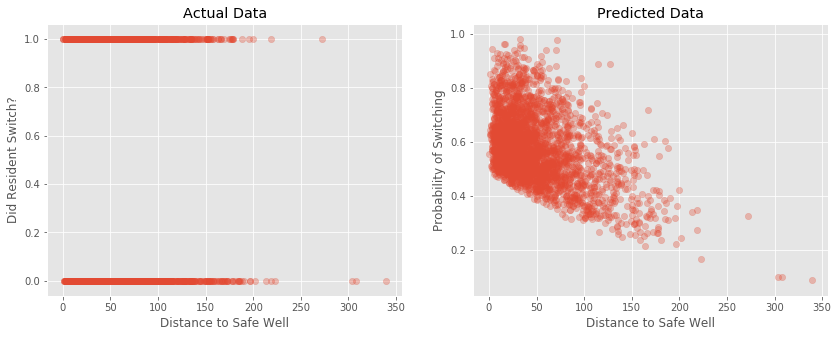

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(wells.dist, wells.switch, s=40, alpha=0.33)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Distance to Safe Well")
axs[0].set_ylabel("Did Resident Switch?")


axs[1].scatter(wells.dist, wells_probabilities[:, 1], s=40, alpha=0.33)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Distance to Safe Well")
axs[1].set_ylabel("Probability of Switching")

### Alltogether

The two regression classes `LinearRegression` and `LogisticRegression` have many methods in common:

  - Both have a `fit` methods.  The `fit` methods for both take the same arguments `X` and `y`.
  - Both have a `predict` method.  The `predict` methods for both take the same argument, `X`.
  
We can summarize this by saying that **`LinearRegression` and `LogisticRegression` have the same interface**.  They have the same methods that are used to the same conceptual tasks.  This allows us to write code that performs high level tasks using the `fit` and `predict` methods, which can then be used with any object that implements both `fit` and `predict` methods.

## Transformers

The second interface we will discuss is the **transformer** interface.

Oftentimes before using a regression or classification model, it is useful or necessary to transform our data set in some way.

A **transformer** consumes a dataset $X$ and outputs a different dataset, oftentimes created by applying some operation to $X$.

### Standardizing Data

One of the most ubiquitous transformers is the `StandardScaler`, which is used to **standardize** a data set.

A vector $x$ is said to be **standardized** if it has mean zero and standard deviation one.  If we take *any* vector, then we can transform it into a standardized one by subtracting its mean and dividing by its standard deviation.  This process is called **standardization**.

Sklearn includes a class used for standardizing all of the columns in a data set.  The `StandardScalar` class implements the **transformation interface**.

1\.  Create a `StandardScalar` object.

In [18]:
standardizer = StandardScaler()

2\. Use the `fit` method.  Behind the scenes this computes and memorizes the mean and standard deviation of all the columns in the dataset.

In [19]:
standardizer.fit(X_wells)

StandardScaler(copy=True, with_mean=True, with_std=True)

3\. Use the `transform` method on *any* dataset to perform the standardization (i.e., subtract the memorized mean from each column and divide by its memorized standard deviation. 

In [20]:
X_wells_standardized = standardizer.transform(X_wells)

In [23]:
for name, col in zip(X_wells_names, X_wells_standardized.T):
    print("Mean of column {}: {:2.2f}".format(name, col.mean()))
    print("Standard Deviation of column {}: {:2.2f}".format(name, col.std()))

Mean of column arsenic: -0.00
Standard Deviation of column arsenic: 1.00
Mean of column dist: 0.00
Standard Deviation of column dist: 1.00
Mean of column assoc: -0.00
Standard Deviation of column assoc: 1.00
Mean of column educ: -0.00
Standard Deviation of column educ: 1.00


We can then fit a regression to our *standardized* data.  The benefit of this is that now our coefficient estimates are all on the *same scale* and hence can be compared.  This is often used to measure the **predictor importance** in a regression.

In [24]:
wells_regression_standardized = LogisticRegression()
wells_regression_standardized.fit(X_wells_standardized, y_wells)

/Users/floraxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(wells_regression_standardized.coef_)

[[ 0.51572495 -0.34391818 -0.06132579  0.17016938]]


### Removing Features

As another example of a transformer, consider `SelectKBest`.  This transformer selects a fixed number of columns from a data set that maximize a given condition.

In our example below, we use the popular **chi squared** test to measure the information shared between each column and response, and then select the 3 columns that maximize the information overlap.

> the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [26]:
best_3_selector = SelectKBest(chi2, k=3)
best_3_selector.fit(X_wells, y_wells)
X_wells_3_best = best_3_selector.transform(X_wells)
X_wells_3_best.shape

(3020, 3)

In [27]:
print(X_wells_names[best_3_selector.get_support()])

['arsenic' 'dist' 'educ']


### Creating our Own Transformer: Grabbing Specific Columns

We can try our hand at creating our own transformer.

Let's build a simple transformer that selects pre-specified columns from our dataset.  So, for example, we can use this to:

  - Select the first column only.
  - Select all but the last column.
  - Select the columns at even indexes.
  
To define a transformer, we need to define a class that implements both `fit` and `transform` methods.

In [28]:
class ColumnSelector(object):
    
    def __init__(self, idxs):
        self.idxs = np.asarray(idxs)
        
    # Fit here doesn't need to do anything.  We already know the indices of the columns
    # we want to keep.
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, X, **transform_params):
        # Need to teat pandas data frames and numpy arrays slightly differently.
        if isinstance(X_wells, pd.DataFrame):
            return X.iloc[:, self.idxs]
        return X[:, self.idxs]

There are a few rules we need to follow:

  - `fit` needs to be defined as either `fit(self, *args, **kwargs)` if we do not need to look at the data to fit the transformer, or `fit(self, X, y, *args, **kwargs)` if we *do* need to look at the data.
  - `fit` needs to return `self`.  This is a common oversight, and will case problems when using `Pipeline` below if forgotten.
  - `transform` needs to be defined as `transform(self, X, **transform_params)`, and returns the transformed data set.
  
This process, of implementing certain methods under some constraints, is called **coding to an interface**.  As long as it is done properly, it allows us to seamlessly use our objects inside of code that was designed to work with built in transformer objects.

Let's try it out.

In [29]:
column_selector = ColumnSelector([0])
column_selector.fit()
X_wells_column_selected = column_selector.transform(X_wells)

In [30]:
print(X_wells_column_selected.shape)
print(X_wells_names[column_selector.idxs])

(3020, 1)
['arsenic']


## Combining Objects: Pipelines

One of the neat ideas that transformers allow is **chaining**.  We can take a single input dataset and apply multiple transformations in sequence.  This process is often called **pipelining** because we have metaphorically plumbed together a sequence of transformations.

The `Pipeline` class in sklearn allows us to chain together transformers, and optionally end the chain with a single regression or classification model.

In [31]:
wells_pipeline = Pipeline([
    ('select_best_3', SelectKBest(chi2, k=3)),
    ('standardize', StandardScaler()),
    ('regression', LogisticRegression())
])

Above, we have chained together some of the transformers we discussed earlier:

```
X --SelectKBest-->        X_best_3 
  --StandardScalar-->     X_best_3_standardized 
  --LogisticRegression--> final_model
```

Once we have a `Pipeline` we only have to `fit` it **one time**.

In [32]:
wells_pipeline.fit(X_wells, y_wells)

/Users/floraxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('select_best_3',
                 SelectKBest(k=3, score_func=<function chi2 at 0x1a11034730>)),
                ('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

This has **many, many advantages**.

  - It allows us to write **less code**.  Every line of code we write contains potential bugs, bugs are bad.
  - It creates a **conceptual unit**.  The `Pipeline` makes clear that each of these transformations is intended to be used **together**.  This makes the code easier to understand.
  - It makes our code **harder to abuse**.  Since we intend the transformers to be used together, we would like other developers or our future selves to think hard about whether they want to separate them.
  - It make the code more re-usable.  Future developers only have to do **one thing** to reuse all our transformers, instead of needing to `fit` all of them separately, this reduces the chance of mistakes.

Once our pipeline is fit, we can access the various transformers and regressors/classifiers by using the `named_steps` method.

In [33]:
# The column means memorized by the pipeling.
print(wells_pipeline.named_steps['standardize'].mean_)
# The column standard deviations memorized by the pipeline.
print(wells_pipeline.named_steps['standardize'].scale_)

[ 1.65693046 48.33186257  4.82847682]
[ 1.10720366 38.47230347  4.01665205]


In [34]:
print(wells_pipeline.named_steps['regression'].coef_)

[[ 0.51720702 -0.34373906  0.17166697]]


### Using a Custom Transformer in a Pipeline: Polynomial Expansion

Let's try to create a pipeline of our own design.

Often it is useful to fit a **polynomial term** in a regression.  So, instead of fitting a regression like

$$ \text{WingSize} \approx a + b \times \text{Latitude} $$

We would fit a polynomial curve, for example, a quadratic like

$$ \text{WingSize} \approx a + b \times \text{Latitude} + b \times \text{Latitude}^2 $$



Our first task is to write a transformer class that consumes a **single** column, and creates a matrix with the square, cube, etc of the column.

In [35]:
class PolynomialExpansion(object):
    
    def __init__(self, degree):
        self.degree = degree
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, X, **transform_params):
        # Initialize our return value as a matrix of all zeros.
        # We are going to overwrite all of these zeros in the code below.
        X_poly = np.zeros((X.shape[0], self.degree))
        # The first column in our transformed matrix is just the vector we started with.
        X_poly[:, 0] = X.squeeze()
        # Cleverness Alert:
        # We create the subsequent columns by multiplying the most recently created column
        # by X.  This creates the sequence X -> X^2 -> X^3 -> etc...
        for i in range(2, self.degree + 1):
            X_poly[:, i-1] = X_poly[:, i-2] * X.squeeze()
        return X_poly

Let's test this out on a simple example.

In [36]:
X = np.array([[1], [2], [3], [4]])
P = PolynomialExpansion(3)
P.fit(X)
P.transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We can use this in a pipeline if our initial matrix has more than one column:  

  - We use the `ColumnSelector` to grab a single column.
  - Then a `PolynomialExpansion` to make ten polynomial columns.

In [37]:
p = Pipeline([
    ('latitude_selector', ColumnSelector([1])),
    ('quadratic_expansion', PolynomialExpansion(10)),
    ('quadratic_model', LinearRegression())
])
p.fit(X_insects, y_insects)

Pipeline(memory=None,
         steps=[('latitude_selector',
                 <__main__.ColumnSelector object at 0x1a206f1940>),
                ('quadratic_expansion',
                 <__main__.PolynomialExpansion object at 0x1a206f1208>),
                ('quadratic_model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Since the last object in our pipeline is a `LinearRegression`, the pipeline has a `predict` method.

In [38]:
insects_predictions = p.predict(X_insects)

Now we can plot the predictons from our model.

Text(0, 0.5, 'Predicted Wing Span')

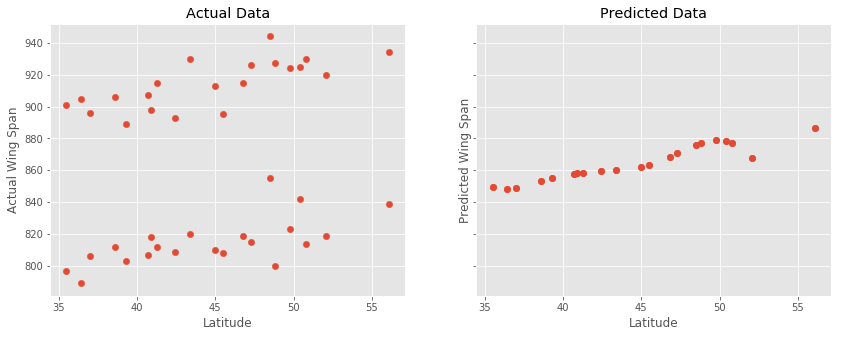

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, insects_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

## Combining Objects: FeatureUnion

What if we want to create a polynomial expansion using **two** features in our model.

To accomplish this, we would need to grab two different columns, take a polynomial transformation of them individually, and then re-join the results into a single matrix:

```  
    +--- Select Column 1 --- Polynomial Expansion ---+
X --+                                                +--- Rejoin --> X transfomed
    +--- Select Column 2 --- Polynomial Expansion ---+
```

The splitting and rejoining operation can be accomplished with another sklean feature, the `FeatureUnion`.

Here's a simple example:

```  
    +--- Select Column 1 ---+
X --+                       +--- Rejoin --> X transfomed
    +--- Select Column 2 ---+
```

In [40]:
two_columns = FeatureUnion([
    ('arsenic_selector', ColumnSelector([0])),
    ('distance_selector', ColumnSelector([1]))
])
two_columns.fit(X_wells)
print(two_columns.transform(X_wells))

[[ 2.36       16.82600021]
 [ 0.71       47.3219986 ]
 [ 2.07       20.96699905]
 ...
 [ 0.51        7.70800018]
 [ 0.64       22.84199905]
 [ 0.66       20.84399986]]


Of course, in this case we could have just used `ColumnSelector([0, 1])`, but this illistrates what `FeatureUnion` can do.

Let's end by putting together the example I outlined above:

```  
    +--- Select Column 1 --- Polynomial Expansion ---+
X --+                                                +--- Rejoin --> X transfomed
    +--- Select Column 2 --- Polynomial Expansion ---+
```

We will use polynomials of degree 2, and end the pipeline with a `LogisticRegression`.

In [41]:
wells_pipeline = Pipeline([
    ('polynomial_expansions', FeatureUnion([
        ('arsenic_quadratic', Pipeline([
            ('arsenic_selector', ColumnSelector([0])),
            ('quadratic_expansion', PolynomialExpansion(2))
        ])),
        ('distance_quadratic', Pipeline([
            ('distance_selector', ColumnSelector([1])),
            ('quadratic_expansion', PolynomialExpansion(2))         
        ]))
    ])),
    ('regression', LogisticRegression())
])

This is now a pipline of considerable complexity.  Even so, using it is exactly the same as any of the simpler pipelines that we constructed earlier.

In [42]:
wells_pipeline.fit(X_wells, y_wells)

/Users/floraxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('polynomial_expansions',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('arsenic_quadratic',
                                                 Pipeline(memory=None,
                                                          steps=[('arsenic_selector',
                                                                  <__main__.ColumnSelector object at 0x1a208b65c0>),
                                                                 ('quadratic_expansion',
                                                                  <__main__.PolynomialExpansion object at 0x1a208b6f28>)],
                                                          verbose=False)),
                                                ('distance_quadratic',
                                                 Pipeline(memory=None,
                                                          ste...
                                                       

In [43]:
wells_quadratic_predictions = wells_pipeline.predict_proba(X_wells)

Text(0, 0.5, 'Probability of Switching')

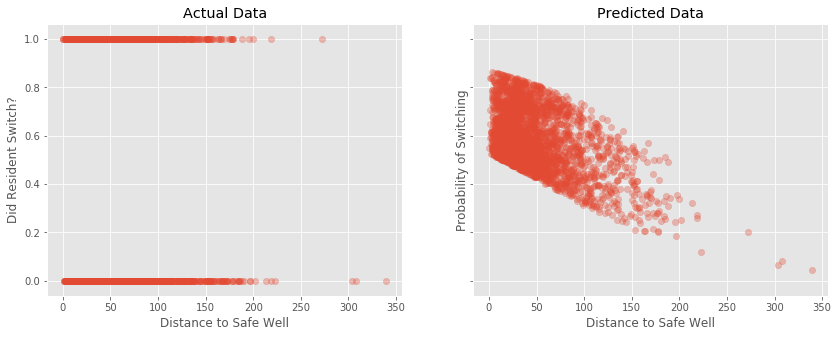

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].scatter(wells.dist, wells.switch, s=40, alpha=0.33)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Distance to Safe Well")
axs[0].set_ylabel("Did Resident Switch?")


axs[1].scatter(wells.dist, wells_quadratic_predictions[:, 1], s=40, alpha=0.33)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Distance to Safe Well")
axs[1].set_ylabel("Probability of Switching")